In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For reproducibility
np.random.seed(777)

In [11]:
# inputs
x = np.linspace(0, 1, 100, dtype=np.float32)

# ground truth
#slopes = np.random.normal(1, 0.5, 100).astype(np.float32)
#intercept = 2.

slopes = 1
intercept = np.random.normal(2, 0.2, 100).astype(np.float32)

# outputs
y = x * slopes + intercept

In [12]:
slopes

1

In [13]:
intercept

array([ 2.17001081,  2.27781796,  2.04238892,  2.27182031,  2.00332594,
        1.91606307,  1.97088599,  1.8200587 ,  1.96155894,  2.2296567 ,
        2.24516511,  1.75589061,  2.15824533,  1.94971073,  1.80486739,
        1.98426056,  1.90481877,  1.62195647,  1.98774207,  1.99280179,
        1.94331658,  1.96269369,  2.01417994,  1.96663082,  1.96881211,
        1.94920695,  2.06428242,  1.88927364,  1.85271835,  1.97535121,
        2.14599109,  1.97564721,  1.9121424 ,  1.74486375,  1.84189713,
        1.73079407,  2.10137701,  1.86958492,  2.28604603,  1.91081905,
        1.76491857,  2.08144903,  1.70013618,  1.88557839,  2.35102296,
        2.00363874,  2.36425662,  2.01824021,  1.85057187,  2.08347511,
        1.96894348,  2.03533483,  2.1827848 ,  1.55614388,  1.46877015,
        1.9911598 ,  2.00362968,  1.8318404 ,  2.24103212,  2.15591955,
        2.31901765,  2.05875397,  1.77038729,  1.93143177,  2.05364919,
        2.37851882,  1.6137352 ,  1.85854387,  2.08805561,  1.82

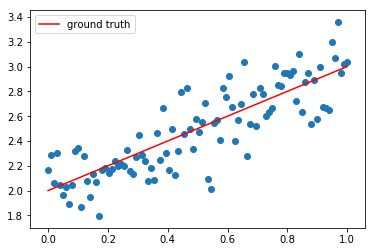

In [14]:
plt.scatter(x, y)
plt.plot(x, x * 1 + 2., label="ground truth", c="r")
plt.legend()
plt.show()

In [15]:
x.dtype

dtype('float32')

In [16]:
y.dtype

dtype('float32')

In [17]:
x.shape

(100,)

In [18]:
y.shape

(100,)

In [19]:
# Inputs
x_pl = tf.placeholder(tf.float32, [100,], name="x_pl")
y_pl = tf.placeholder(tf.float32, [100,], name="y_pl")

In [20]:
# Computation
## Variables = Parameters = Weights
w = tf.Variable(.1, tf.float32)
b = tf.Variable(0., tf.float32)

In [21]:
## prediction = y_hat = hypothesis
preds = x_pl * w + b # (100,)

In [22]:
# objective = loss = cost
loss = tf.reduce_mean(tf.square(preds - y)) # L2 loss

In [23]:
# Optimization = Training
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
train_op = optimizer.minimize(loss)

In [24]:
# start a session
sess = tf.Session()

In [25]:
# initialize all variables
sess.run(tf.global_variables_initializer())

In [26]:
loss_list, w_list, b_list = [], [], []
for epoch in range(20):
    _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x_pl:x, y_pl:y})
    print(epoch+1, "\t", _loss, "\t", _w, "\t", _b)
    loss_list.append(_loss)
    w_list.append(_w)
    b_list.append(_b)

1 	 6.05421 	 0.1 	 0.0
2 	 3.38923 	 0.359337 	 0.48779
3 	 1.9045 	 0.552518 	 0.852089
4 	 1.07731 	 0.696326 	 1.12421
5 	 0.616445 	 0.803286 	 1.32753
6 	 0.359676 	 0.882747 	 1.47948
7 	 0.216611 	 0.941689 	 1.5931
8 	 0.136895 	 0.98532 	 1.6781
9 	 0.0924709 	 1.01753 	 1.74174
10 	 0.0677097 	 1.04121 	 1.78943
11 	 0.0539035 	 1.05854 	 1.82521
12 	 0.0462007 	 1.07113 	 1.85211
13 	 0.0418987 	 1.08019 	 1.87236
14 	 0.0394915 	 1.08661 	 1.88766
15 	 0.0381403 	 1.09108 	 1.89926
16 	 0.0373776 	 1.09408 	 1.90809
17 	 0.0369432 	 1.096 	 1.91485
18 	 0.0366918 	 1.09712 	 1.92007
19 	 0.0365427 	 1.09764 	 1.92414
20 	 0.0364507 	 1.09772 	 1.92734


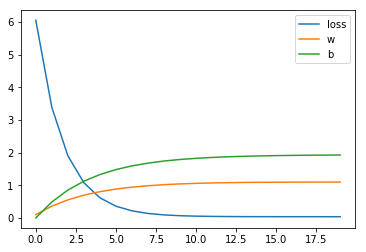

In [27]:
plt.plot(loss_list, label="loss")
plt.plot(w_list, label="w")
plt.plot(b_list, label="b")
plt.legend()
plt.show()